In [114]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (15,10)

Section 1.A

A Gaussian is a continuous proability density function that is symmetrical, and centered at the mean. Its width is based on the variance. The distribution is useful, as you can characterize the  probability of events happening based on the distance from the mean, and all Gaussian distributions follow the same pattern when it comes to the corresponding probability based on how many standard deviations you are from the mean.

In [115]:
# Section 1.B

print("Probability that value is less than given sigma")
print("Sigma  Probability")

for i in range(-3, 3):
    if i < 0:
        print(i, "    ", stats.norm.cdf(i))
    else:
        print("",i, "    ", stats.norm.cdf(i))

Probability that value is less than given sigma
Sigma  Probability
-3      0.0013498980316300933
-2      0.022750131948179195
-1      0.15865525393145707
 0      0.5
 1      0.8413447460685429
 2      0.9772498680518208


Section 1.B

Sigma  Probability
-3     0.0013498980316300933
-2     0.022750131948179195
-2     0.15865525393145707
 0     0.5
 1     0.8413447460685429
 2     0.9772498680518208
 3     0.9986501019683699
 
The values above represent the probability that a value is less than the sigma given. These values were obtained using scipy's stats.norm.cdf() function. This function takes an argument of the sigma, and integrates the given distribution, in this case a gaussian distribution from negative infinity to the given sigma. This is evident as the probability increases towards 1 as the sigma increases. These values also are equal to the ones in the Cumulative Z table which has the probability that a value is less than a given sigma. The value of 1 - the stats.norm.cdf() function would be the probability of a value being greater than the given one, as that would represent the area under the curve left over from the previous integral to that point. 

Sigma  Probability from Z table
-3     0.00135
-2     0.02275
-1     0.15866
 0     0.50000
 1     0.84134
 2     0.97725
 3     0.99865

In [28]:
# Section 1.C

print("Expected Sigma Value vs Computed from Given Probability")
print("Expected  Computed")
for i in range(-3, 3):
    if i < 0:
        print(i, "    ", stats.norm.ppf(stats.norm.cdf(i)))
    else:
        print("",i, "     ", stats.norm.ppf(stats.norm.cdf(i)))

Expected Sigma Value vs Computed from Given Probability
Expected  Computed
-3      -3.0000000000000004
-2      -2.000000000000001
-1      -1.0
 0       0.0
 1       1.0
 2       2.0000000000000004


Section 1.C

Expected Sigma Value vs Computed from Given Probability
Expected  Computed
-3        -3.0000000000000004
-2        -2.000000000000001
-1        -1.0
 0         0.0
 1         1.0
 2         2.0000000000000004
 3         2.9999999999999982
 
The stats.norm.ppf() function takes a probability for an argument. The argument is the probability that a value is less than a certain sigma. The function then computes the sigma of that probability. Using the probability values obtained in Section 1.B, it can be seen that when they are given to the ppf() function they return either an equal value, or one that is very close. The reason behind the non exact values is likely due to machine error, or not having enough precision in the given probability values.

Section 1.D

The standard gaussian distribution has mean sigma of 0. A negative sigma means that the probability of a value being less than that sigma is lower than 50%, where as the probability of a value being greater than that sigma is higher than 50%.

Section 2.A

The Rayleigh distribution is common when comparing the magnitudes of vectors. The rayleigh distribution can only be applied to vectors where the components have mean 0, equal variance, and are uncorrelated.

$f(x)=\frac{x}{\sigma^2}\mathrm{e}^{\frac{\mathrm{-x^2}}{2\sigma^2}}$


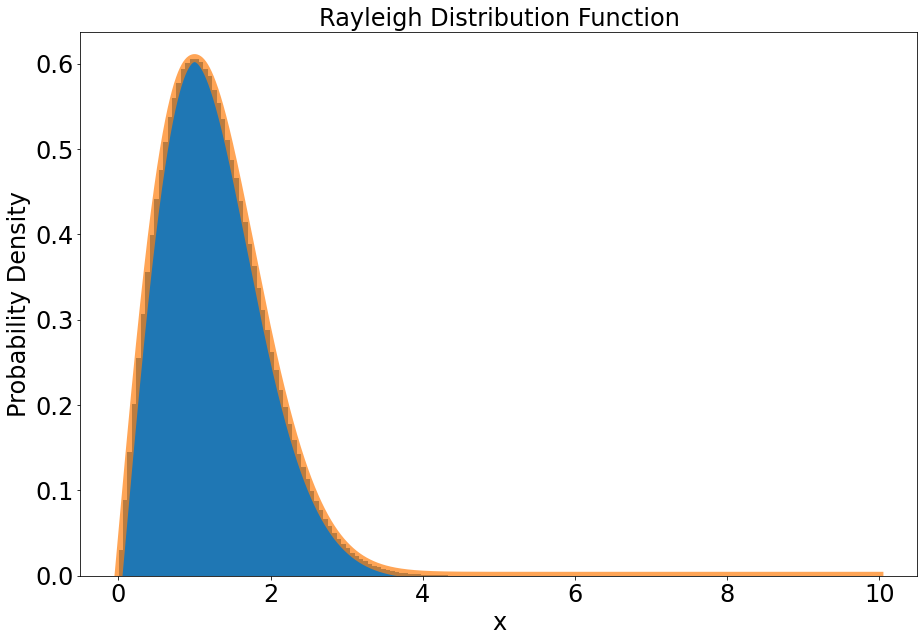

In [116]:
# Section 2.B

d = stats.rayleigh.rvs(size = 10000000)

fig1, ax1 = plt.subplots(1, 1)
ax1.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
x = np.linspace(0,10,10000)
ax1.plot(x,stats.rayleigh.pdf(x),linewidth = 8,alpha = 0.7)
plt.xlabel("x", fontsize = 24)
plt.ylabel("Probability Density", fontsize = 24)
plt.title("Rayleigh Distribution Function", fontsize = 24)
plt.show()

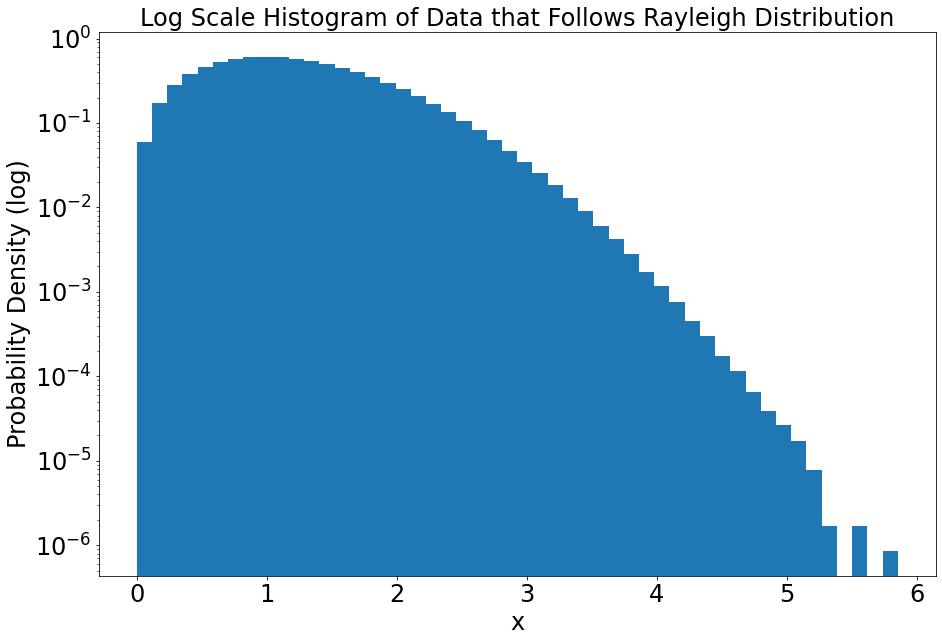

In [117]:
ax = plt.hist(d,50, density=True)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.xlabel("x", fontsize = 24)
plt.ylabel("Probability Density (log)", fontsize = 24)
plt.title("Log Scale Histogram of Data that Follows Rayleigh Distribution", fontsize = 24)
plt.show()

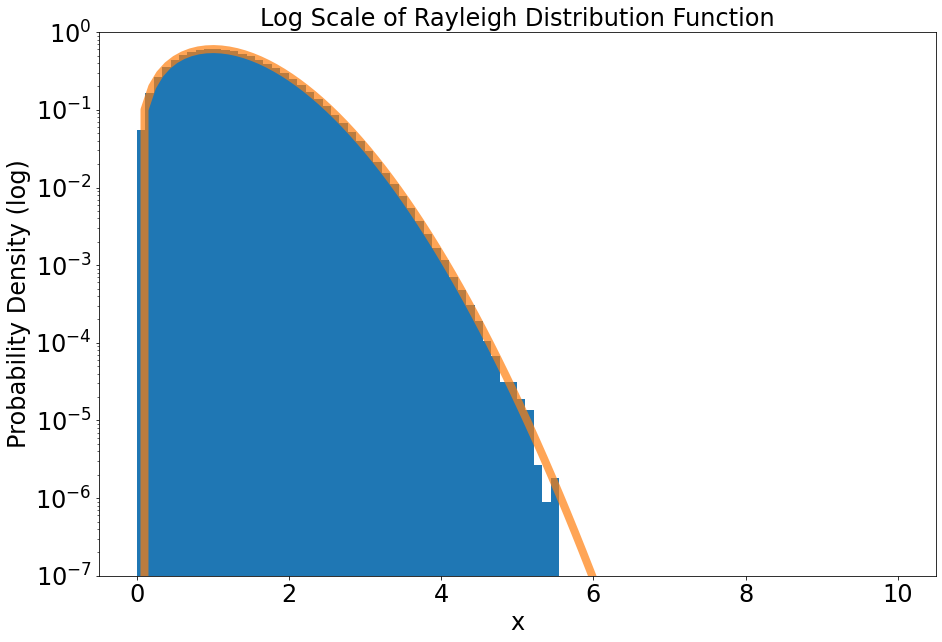

In [20]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.yscale('log')
plt.tick_params(labelsize = 24)
x = np.linspace(0,10,100)
plt.ylim(0.0000001, 1)
ax.plot(x,stats.rayleigh.pdf(x),linewidth = 8,alpha = 0.7)
plt.xlabel("x", fontsize = 24)
plt.ylabel("Probability Density (log)", fontsize = 24)
plt.title("Log Scale of Rayleigh Distribution Function", fontsize = 24)
plt.show()

Section 2.B

The first plot shows the data plotted with a Rayleigh distribution, and it seems to follow the distribution exactly.

The second plot is the semilog of the data in order to better see how the rare events follow the Rayleigh distribution.

The third plot also plots the semilog of the Rayleigh distribution on top of the histogram, this serves to show that the data doesn't perfectly follow the distribution at the rare events.

Section 3.A

Hypothetical measurement is 4.5, I have chosen this value as it would be a rare event.

Section 3.B

What is the probability if there was no signal, that we could get a measurement that is more signal like than 4.5.

Section 3.C

$\int_{0.0015}^\infty\frac{x}{\sigma^2}\mathrm{e}^{\frac{\mathrm{-x^2}}{2\sigma^2}},\mathrm{d}x$

This is integrating the equation for the probability density function of a Rayleigh distribution from the measurement, to infinity. This integral will then get the probability of a measurement being greater than that value if there wasn't a signal.

In [21]:
# Section 3.D

prob_less = stats.rayleigh.cdf(4.5)
prob_greater = 1 - prob_less

print("prob_greater ", prob_greater)

# Section 3.E

sigma = abs(stats.norm.ppf(prob_greater))

print("Sigma ", sigma)

prob_greater  4.006529739297715e-05
Sigma  3.9440091612702726


Because the ppf integrates from negative infinity, the outputted sigma is negative. Because a gaussian distribution is symmetrical, I take the absolute value to get the proper sigma value.

If we take the value of 5$\sigma$ to be enough to rule out the possibility of noise, this value is not rare enough to be sure that it was not caused by noise in the data.

In [34]:
# Section 4
values = [0.5, 1, 2, 3, 4]

for i in values:
    prob_less = stats.rayleigh.cdf(i)
    print("prob_less",i," ", prob_less)
print()

for i in values:
    prob_greater = 1 - stats.rayleigh.cdf(i)
    print("prob_greater",i," ", prob_greater)
print()

for i in values:
    sigma_less = stats.norm.ppf(stats.rayleigh.cdf(i))
    print("sigma_less",i," ", sigma_less)
print()

for i in values:
    sigma_greater = stats.norm.ppf(1 - stats.rayleigh.cdf(i))
    print("sigma_greater",i," ", sigma_greater)

prob_less 0.5   0.1175030974154046
prob_less 1   0.3934693402873666
prob_less 2   0.8646647167633873
prob_less 3   0.9888910034617577
prob_less 4   0.9996645373720975

prob_greater 0.5   0.8824969025845955
prob_greater 1   0.6065306597126334
prob_greater 2   0.1353352832366127
prob_greater 3   0.011108996538242266
prob_greater 4   0.00033546262790251635

sigma_less 0.5   -1.1875615473802972
sigma_less 1   -0.27028802073873587
sigma_less 2   1.1015196284987503
sigma_less 3   2.286620338178611
sigma_less 4   3.4011926561446617

sigma_greater 0.5   1.1875615473802972
sigma_greater 1   0.27028802073873587
sigma_greater 2   -1.10151962849875
sigma_greater 3   -2.286620338178611
sigma_greater 4   -3.4011926561446617


Section 4

As the measured value increases, the probability of a value being less than it increases, while the probability of being greater than it decreases.

The magnitude of sigma increases as the probability decreases. This makes sense as there is less area under the curve of the gaussian distribution the further out from the mean that you are.

The values of sigma for the probabilities of being less than or greater than for a given value are equal in magnitude, but opposite in sign, this makes sense as the corresponding probabilities would be located at sigmas on opposite sides of the gaussian distribution which is symmetrical.

Non Continuous Distributions A

The Binomial distribution is a discrete probability density function that predicts the probability of n successes from running N trials.

The Poisson distribution is another discrete probability distribution function that predicts the probability of k events happening during a certain time period given the average number of events that happen during the time period.

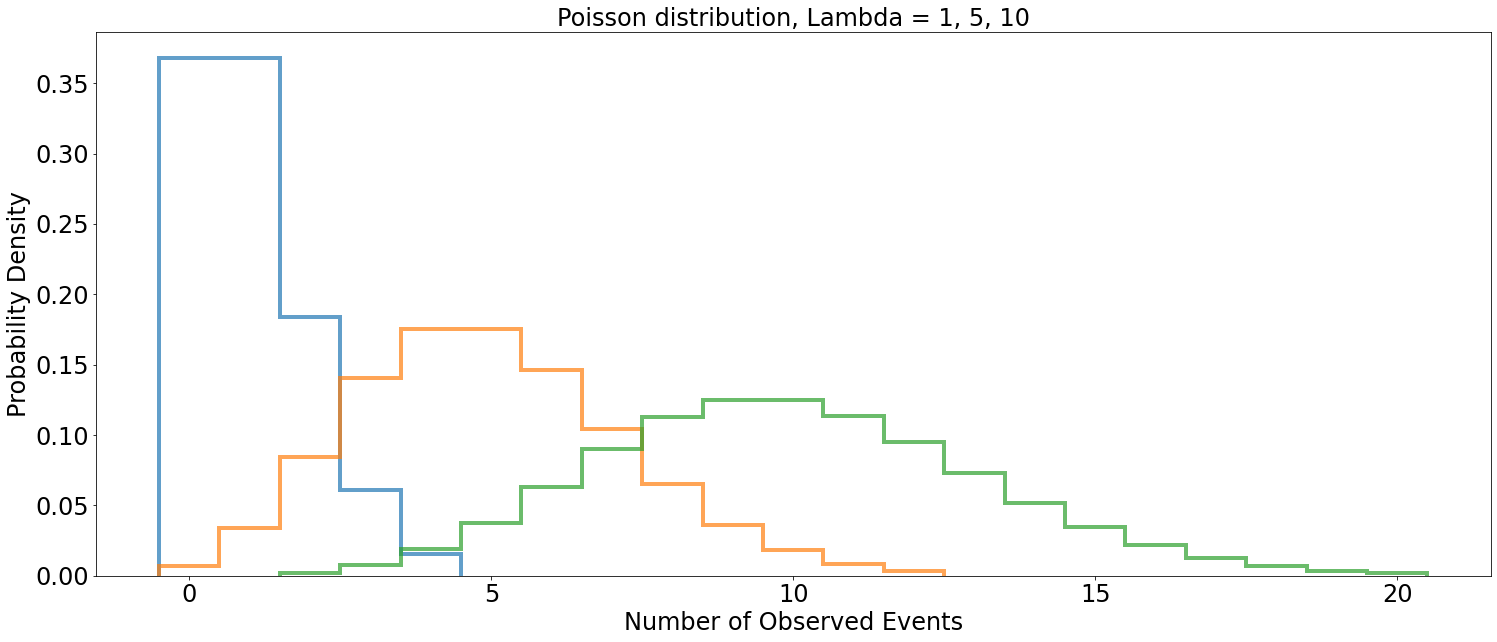

In [125]:
# Non Continuous Distributions B

plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots(1, 1)
ax.tick_params(labelsize = 24)

lamb = [1, 5, 10]
for i in lamb:
    x = np.arange(stats.poisson.ppf(0.001, i, 0), stats.poisson.ppf(0.999, i, 0))
    edges = np.arange(x[0]-0.5, x[-1]+1.5, 1)

    ax.stairs(stats.poisson.pmf(x, i, 0), edges, linewidth = 4, alpha = 0.7)

plt.xlabel("Number of Observed Events", fontsize = 24)
plt.ylabel("Probability Density", fontsize = 24);
plt.title("Poisson distribution, Lambda = 1, 5, 10", fontsize = 24);
plt.show()

It can be seen from the above plot that Changing the value of lambda causes the plots to lose height and become wider, as well as slightly more symmetrical. The mean of the plot is also shifted to be the value of lambda given.

Section C

Given that the decay of an atom in a radioactive element decays on average twice in a month, what is the probability that it decays 6 times in a month?

In [122]:
probability = stats.poisson.pmf(6, 2)
print(probability)

0.012029802954365565


Section D

The true value of any probabilities for an event occurring could never actually be acheived experimentally. The true value of an event occuring is likely a continuous value, as there are many variables at play when something is happening. If the probabilities and sigmas can only be a discrete number of values, then its possible that the true value could never be reached.

Section E

It makes sense that the averages of discrete distributions can be continuos, as the averge of a series of integers can  also be continuous. For example the average of 1 and 4 is 2.5. The average is based on a sum of all of the counts, and a division by the number of counts, so it can be continuous, whereas the probabilities themselves must be tied to specific events, which there are a discrete number of.